In [87]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns
from xgboost.sklearn import XGBRegressor
from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# "₸"

## Read from CSV

In [51]:
md = pd.read_csv('cars500.csv')


# Set 0 to null values

In [52]:
md.mileage = md.mileage.fillna(0)

# Let's see some info from numeric fields

In [65]:
md.describe()

,year,price,capacity,mileage,view_amount
count,11668.000000,1.166800e+04,11664.000000,1.166800e+04,11668.0
mean,2004.455005,4.002574e+06,2.428479,1.334746e+05,0.0
std,8.061218,5.097716e+06,0.996999,4.485989e+05,0.0
min,1990.000000,1.111110e+05,0.100000,0.000000e+00,0.0
25%,1997.000000,1.200000e+06,1.600000,0.000000e+00,0.0
50%,2005.000000,2.500000e+06,2.000000,6.500000e+04,0.0
75%,2012.000000,4.800000e+06,2.800000,1.650000e+05,0.0
max,2018.000000,1.500000e+08,8.000000,9.999999e+06,0.0


# Let's see name of columns

In [66]:
md.columns

Index(['city', 'brand', 'name', 'year', 'price', 'body', 'capacity',
       'capacity_type', 'mileage', 'transmission', 'image', 'description',
       'view_amount'],
      dtype='object')

# Unique values of "body, city, ..."

In [67]:
print(md.body.unique())
print(md.city.unique())
print(md.brand.unique())
print(md.name.unique())
print(md.capacity_type.unique())
print(md.transmission.unique())
print(md.wheel.unique())
print(md.color.unique())
print(md.drive_unit.unique())
print(md.customs.unique())

['седан' 'внедорожник' 'купе' 'кроссовер' 'хэтчбек/лифтбек' 'минивэн'
 'универсал' 'микроавтобус' 'лимузин' 'микровэн' 'фургон' 'пикап'
 'родстер' 'кабриолет']
['Алматы' 'Астана' 'Актобе' 'Караганда' 'Усть-Каменогорск' 'Шымкент'
 'Жетысай' 'Атырау' 'Актау' 'Тараз' 'Костанай' 'Уральск' 'Кызылорда'
 'Жезказган' 'Экибастуз' 'Каскелен' 'Павлодар' 'Туркестан' 'Жосалы'
 'Кокшетау' 'Жанаозен' 'Семей' 'Байконыр' 'Жанакорган' 'Талгар' 'Шу'
 'Кульсары' 'Асыката' 'Байтерек' 'Абай (Сарыагашский р-н)' 'Петропавловск'
 'Аральск' 'Челябинск' 'Аягоз' 'Кентау' 'Жымпиты' 'Темиртау'
 'Отеген батыра' 'Балхаш' 'Талдыкорган' 'Санкт-Петербург' 'Мерке'
 'Аксукент' 'Есик' 'Айтеке би' 'Теренозек' 'Атбасар' 'Шубаркудук' 'Риддер'
 'Шахтинск' 'Арысь' 'Рудный' 'Кандыагаш' 'Алга' 'Щучинск'
 'Федоровка (Федоровский р-н)' 'Карабалык (Карабалыкский р-н)'
 'Степногорск' 'Кордай' 'Урджар' 'Казалинск' 'Ушарал' 'Сатпаев' 'Капчагай'
 'Шардара' 'Абай (Абайский р-н)' 'Каркаралинск' 'Тайынша' 'Ленгер'
 'Шолаккорган' 'Шалкар' '

AttributeError: 'DataFrame' object has no attribute 'wheel'

# And delete unused  culumns

In [56]:
md.drop(['customs', 'drive_unit', 'color', 'wheel','avg_price'], axis='columns', inplace=True)

# Preprocessing values

In [57]:
print("Too new: %d" % md.loc[md.year >= 2018].count()['brand'])
print("Too old: %d" % md.loc[md.year < 1950].count()['brand'])
print("Too cheap: %d" % md.loc[md.price < 100].count()['brand'])
print("Too expensive: " , md.loc[md.price > 15000000].count()['brand'])
print("Too few km: " , md.loc[md.mileage < 10].count()['brand'])
print("Too many km: " , md.loc[md.mileage > 200000].count()['brand'])

print("Fuel types: " , md['capacity_type'].unique())


print("Vehicle types: " , md['body'].unique())
print("Brands: " , md['name'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = md.drop_duplicates(['brand','price','capacity_type','year','transmission','name','mileage','capacity_type'])

#### Removing the outliers
dedups = dedups[
        (dedups.year <= 2016) 
      & (dedups.year >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 15000000)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['brand'].count() / md['brand'].count()))


Too new: 194
Too old: 0
Too cheap: 0
Too expensive:  378
Too few km:  4026
Too many km:  2092
Fuel types:  ['petrol' 'gas' 'diesel' nan]
Vehicle types:  ['седан' 'внедорожник' 'купе' 'кроссовер' 'хэтчбек/лифтбек' 'минивэн'
 'универсал' 'микроавтобус' 'лимузин' 'микровэн' 'фургон' 'пикап'
 'родстер' 'кабриолет']
Brands:  ['Toyota' 'Audi' 'Cadillac' 'Bentley' 'ВАЗ (Lada)' 'Lexus' 'Infiniti'
 'Mercedes-Benz' 'Kia' 'Porsche' 'Volkswagen' 'Mitsubishi' 'Fiat' 'Daewoo'
 'Skoda' 'Subaru' 'Land Rover' 'JAC' 'Chrysler' 'BMW' 'Renault' 'Jaguar'
 'Hyundai' 'Nissan' 'GMC' 'Opel' 'ГАЗ' 'Foton' 'Jeep' 'Rover' 'Mazda'
 'Dodge' 'Seat' 'ЗАЗ' 'Chevrolet' 'Geely' 'УАЗ' 'Honda' 'SsangYong'
 'Citroen' 'Hummer' 'Great Wall' 'ТагАЗ' 'Wuling' 'Ford' 'Lifan' 'Peugeot'
 'Renault Samsung' 'Volvo' 'Acura' 'International' 'Dong Feng' 'Mini'
 'Changan' 'Chery' 'FAW' 'Lincoln' 'Tesla' 'Saturn' 'ИЖ' 'Isuzu' 'Suzuki'
 'Daihatsu' 'Ravon' 'Ferrari' 'Mercedes-Maybach' 'Iveco' 'Maserati'
 'Yutong' 'Asia' 'Saab' 'Mahindra' 

# How many empty values in which column

In [58]:
md.isnull().sum()

city                0
brand               0
name                0
year                0
price               0
body                0
capacity            4
capacity_type      45
mileage             0
transmission        0
image             421
description      2025
view_amount         0
dtype: int64

# Sets for all emply  vals "not-declared"

In [68]:
dedups.fillna(value='not-declared', inplace=True)

# And you can see values are filled

In [60]:
dedups.isnull().sum()

city             0
brand            0
name             0
year             0
price            0
body             0
capacity         3
capacity_type    0
mileage          0
transmission     0
image            0
description      0
view_amount      0
dtype: int64

# Diagram for 'body', 'name', 'brand', 'transmission', 'capacity_type' 

body
седан              4860
внедорожник        1235
кроссовер          1094
хэтчбек/лифтбек    1079
универсал           661
Name: body, dtype: int64


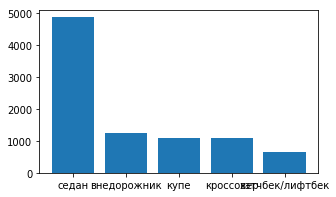

name
Toyota           1576
ВАЗ (Lada)       1293
Mercedes-Benz    1003
Volkswagen        680
Nissan            628
Name: name, dtype: int64


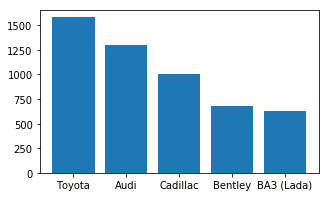

brand
Camry                 486
Passat                247
Land Cruiser Prado    205
2114 (хэтчбек)        204
Golf                  166
Name: brand, dtype: int64


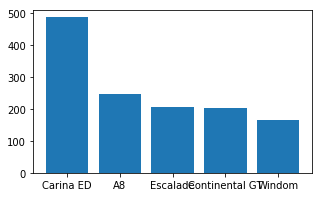

transmission
механика     4431
автомат      4383
типтроник    1017
вариатор      157
робот          37
Name: transmission, dtype: int64


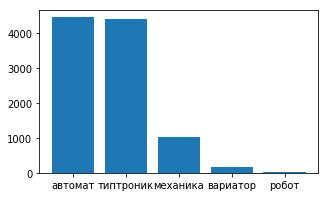

capacity_type
petrol          7782
gas             1453
diesel           754
not-declared      37
Name: capacity_type, dtype: int64


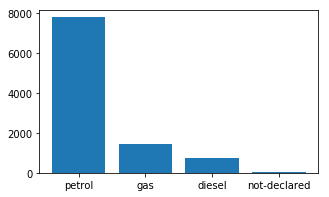

In [63]:
categories = ['body', 'name', 'brand', 'transmission', 'capacity_type']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, v)
    plt.show()


# Feature engineering
# Adding the name length to see how much does a long description influence the price

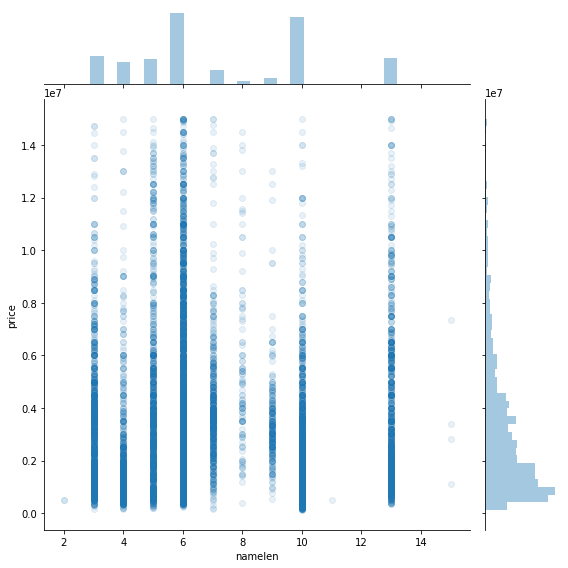

In [70]:

dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
                    alpha=0.1, 
                    size=8)

# Save in dedups and preprocessing "words" in column 'body', 'name', 'brand', 'transmission', 'capacity_type'

In [38]:
labels = ['body', 'name', 'brand', 'transmission', 'capacity_type']
les = {}

for l in labels:
    les[l] = preprocessing.LabelEncoder()
    les[l].fit(dedups[l])
    tr = les[l].transform(dedups[l]) 
    dedups.loc[:, l + '_feat'] = pd.Series(tr, index=dedups.index)

labeled = dedups[ ['price'
                        ,'year'
                        ,'mileage'] 
                    + [x+"_feat" for x in labels]]

# Correlation map and cofficent for all

,price,year,mileage,body_feat,brand_feat,transmission_feat,capacity_type_feat
price,1.000000,0.552821,-0.062727,-0.499082,0.279563,-0.134224,-0.070210
year,0.552821,1.000000,-0.094374,-0.151817,0.058843,0.020317,0.026549
mileage,-0.062727,-0.094374,1.000000,0.024562,-0.006065,0.015936,-0.012684
body_feat,-0.499082,-0.151817,0.024562,1.000000,-0.351533,0.142799,0.210379
brand_feat,0.279563,0.058843,-0.006065,-0.351533,1.000000,-0.110990,-0.143760
transmission_feat,-0.134224,0.020317,0.015936,0.142799,-0.110990,1.000000,0.001628
capacity_type_feat,-0.070210,0.026549,-0.012684,0.210379,-0.143760,0.001628,1.000000


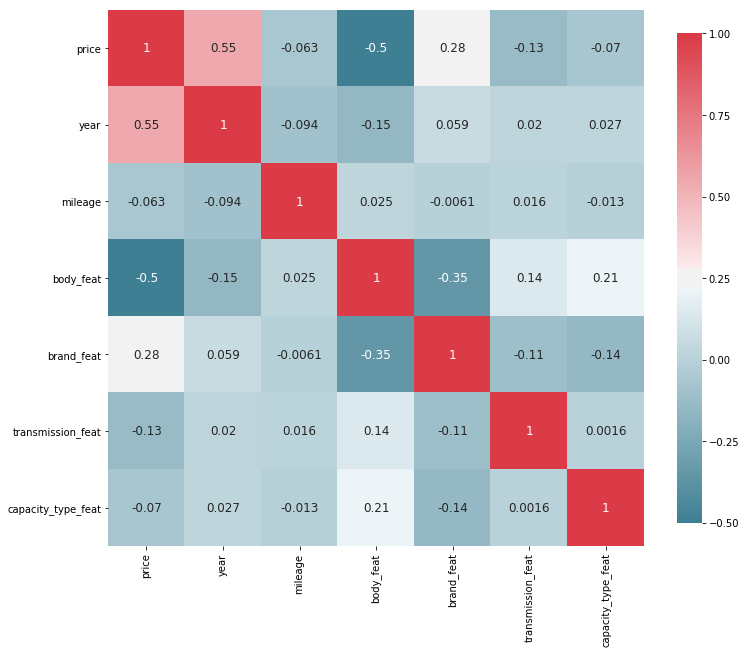

In [91]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(labeled)
labeled.corr()


# Which column strong effected for price

In [92]:
labeled.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

year                  0.552821
body_feat             0.499082
brand_feat            0.279563
transmission_feat     0.134224
capacity_type_feat    0.070210
mileage               0.062727
Name: price, dtype: float64

# price log1p 

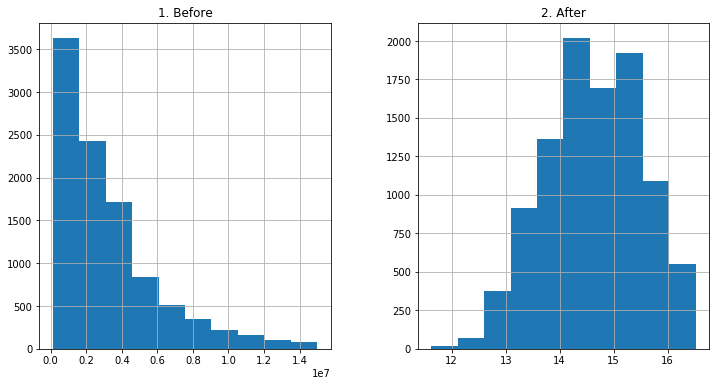

In [46]:
Y = labeled['price']
X = labeled.drop(['price'], axis='columns', inplace=False)


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

# Train test vals

In [73]:
# Basic imports and functions
# Trying with some model from scikit learn: LinearRegression, LR with L2 regularization and others.
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split


test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 123)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000

(6717, 6) (3309, 6) (6717,) (3309,)


# Random Forest and Grid Search fit model

In [82]:

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1, 3, 5]
              , "min_samples_split" : [2, 3]
              , "max_depth": [5, 6, 7]
              , "n_estimators": [100, 200]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.3s finished


# Function to evaluate my model with Cross validation# 

In [81]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    return scores.mean()

# RandomForestRegressor for best_params

In [84]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.82


# Feature importances

Feature ranking:
1. feature 0 (0.486322)
2. feature 3 (0.316784)
3. feature 4 (0.095590)
4. feature 2 (0.083772)
5. feature 5 (0.011918)
6. feature 1 (0.005613)


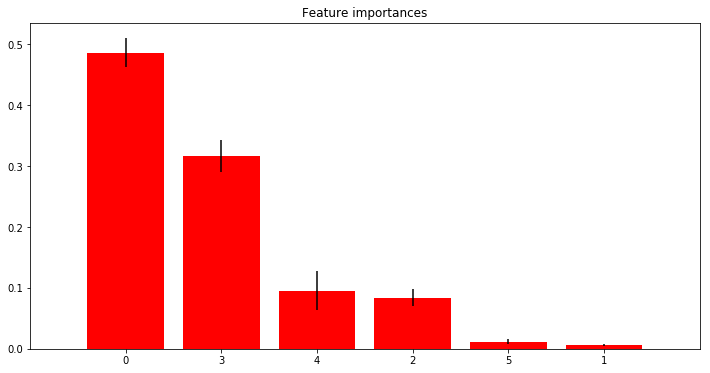

array(['year', 'mileage', 'body_feat', 'brand_feat', 'transmission_feat',
       'capacity_type_feat'], dtype=object)

In [85]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

X_train.columns.values

# XGBRegressor for model 

Accuracy: 83.06%


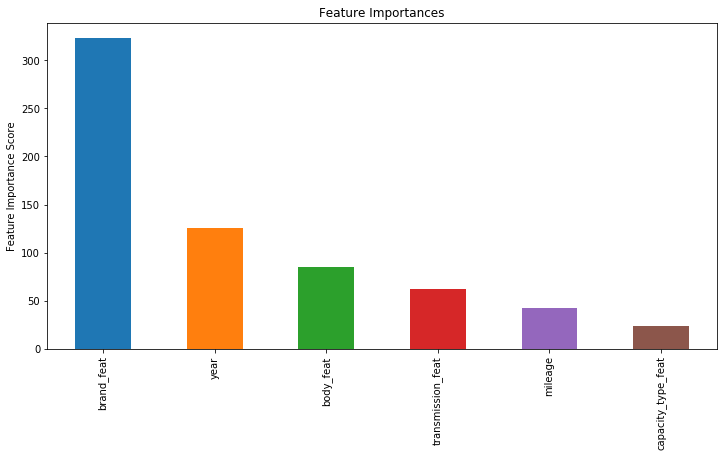

In [67]:
model = XGBRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_val)
accuracy = model.score(X_val, y_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [90]:
# def scatter(x, y, xlabel, ylabel):
#     plt.scatter(x, y, s=1)
#     plt.xlabel(xlabel)
#     plt.ylabel(ylabel)
#     plt.show()

# for f in X.columns:
#     scatter(X[f], Y, f, 'Y')